In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
#store data
train_dt=pd.read_csv("/content/drive/MyDrive/spam/spam.csv",encoding='latin-1')


In [4]:
train_dt

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
train_dt = train_dt[['v1', 'v2']]
train_dt.columns = ['Spam or not', 'message']

In [6]:
train_dt.isnull()

,Spam or not,message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [7]:
#data preprocessing
from nltk.corpus import stopwords

nltk.download('stopwords')

stp = stopwords.words('english')

def clean_text(text):
    # Check if the input is a string or bytes-like object
    if not isinstance(text, (str, bytes)):
        return text

    text = text.lower()

    # Mentions
    text = re.sub(r'@\S+', '', text)

    # Punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Remove links
    text = re.sub(r'http\S+', '', text)

    # Remove unnecessary spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove single characters
    text = re.sub(r'\b\w\b', '', text)

    # Remove unknown email addresses
    text = re.sub(r'\b\S+@\S+\.\S+\b', '', text)

    words = nltk.tokenize.word_tokenize(text, language="english", preserve_line=True)
    text = " ".join([i for i in words if i not in stp and len(i) > 2])

    return text

# Load and clean the training data
train_dt["Clean_desc"] = train_dt["message"].apply(clean_text)

# Load and clean the test data


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-7-74c9d4dbd8c3>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dt["Clean_desc"] = train_dt["message"].apply(clean_text)


In [8]:
train_dt

,Spam or not,message,Clean_desc
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts 21st m...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried contact å750 pound prize claim ...
5568,ham,Will Ì_ b going to esplanade fr home?,going esplanade home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [9]:
#vectorize
vectorizer = TfidfVectorizer(stop_words='english')
train_vectors = vectorizer.fit_transform(train_dt['Clean_desc'])


In [10]:
X_train, X_val, y_train, y_val = train_test_split(
    train_vectors, train_dt['Spam or not'], test_size=0.3, random_state=42
)

# Multinomial Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_val)
accuracy_nb = accuracy_score(y_val, y_pred_nb)
print(f"Multinomial Naive Bayes Accuracy on the validation set: {accuracy_nb:.2%}")
# Display classification report
print("\nClassification Report on the test set:")
print(classification_report(y_val, y_pred_nb))


Multinomial Naive Bayes Accuracy on the validation set: 96.11%

Classification Report on the test set:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       1.00      0.70      0.83       219

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



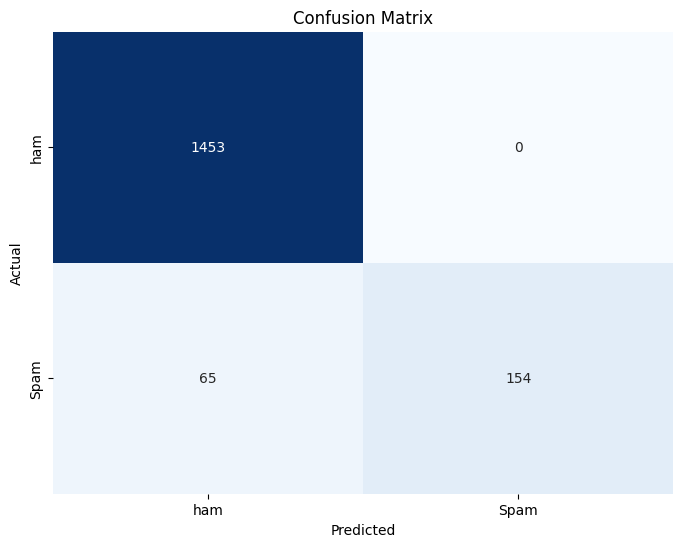

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['ham', 'Spam'], yticklabels=['ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


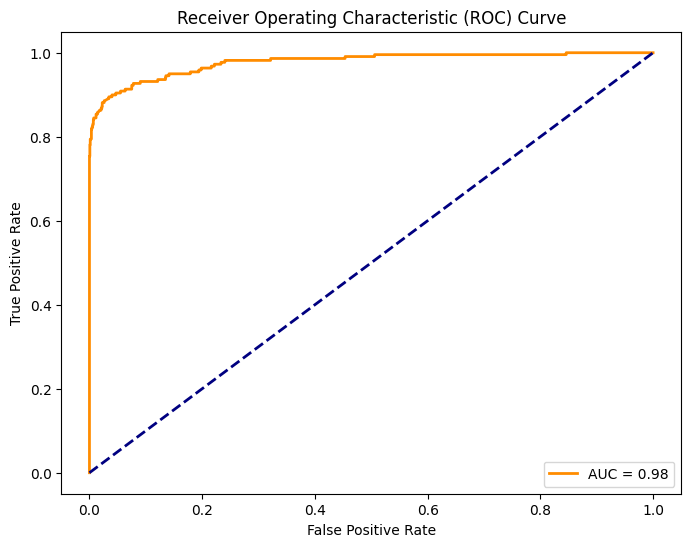

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# 'ham' and 'spam' to 0 and 1
label_encoder = LabelEncoder()
y_val_binary = label_encoder.fit_transform(y_val)
y_prob_nb = model_nb.predict_proba(X_val)[:, 1]

fpr_nb, tpr_nb, _ = roc_curve(y_val_binary, y_prob_nb)


roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'AUC = {roc_auc_nb:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


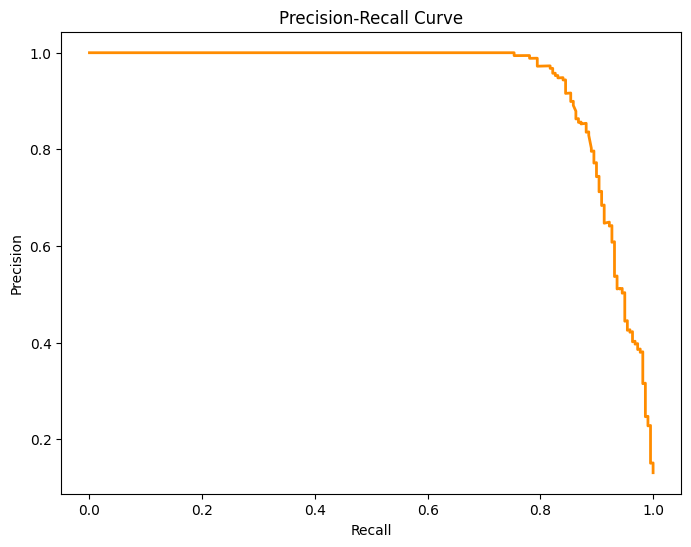

In [13]:
from sklearn.metrics import precision_recall_curve
# Convert 'ham' and 'spam' to 0 and 1
label_encoder = LabelEncoder()
y_val_binary = label_encoder.fit_transform(y_val)
precision_nb, recall_nb, _ = precision_recall_curve(y_val_binary, y_prob_nb)

plt.figure(figsize=(8, 6))
plt.plot(recall_nb, precision_nb, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [14]:
#prediction on entire dataset# Multinomial Naive Bayes
X_train=train_vectors
y_train=train_dt['Spam or not']
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
train_dt['Predicted'] = model_nb.predict(train_vectors)

comparison_df = pd.DataFrame({
    'Actual': train_dt['Spam or not'],
    'Predicted': train_dt['Predicted']
})

print(comparison_df.head(10))


  Actual Predicted
0    ham       ham
1    ham       ham
2   spam      spam
3    ham       ham
4    ham       ham
5   spam       ham
6    ham       ham
7    ham       ham
8   spam      spam
9   spam      spam


<ipython-input-14-267cbab81dd0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dt['Predicted'] = model_nb.predict(train_vectors)
